# USA Real Estate Prices Prediction
## Introduction
For the past decades real estate has been one of the hottest topics and especially in North America. The goal of my project is to use history of previously sold real-estate properties to predict the the price of any given real estate. The dataset encompasses dates of sale from 1900 up to 2023. Of course I won't be using all of the data, only from 2010-2023 to account for inflation and devaluation of USD. 

The question that will be answered throughout this project is: 
> **How much will a given property cost given the past history of real-estate sold?**

## Methods
The variables that I will be using to answer the major question are: 
1. bed - number of beds 
2. bath - number of baths
3. city - city in which the property was sold
4. state - state in which the property was sold
5. acre lot - how many acres was the land
6. house size - how big is the living space in square feet
7. price - price of the property in thousands of USD

## Expected outcomes and significance:
### What do you expect to find?
That overall the housing prices are on the rise
### What impact could such findings have?
It can give you an idea of how bad of a condition housing market is
### What future questions could this lead to?
Will the prices increase or decrease in the future?

In [22]:
# install these packages! it is going to take a bit
install.packages("tidyverse")
install.packages("repr")
install.packages("tidymodels")

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'repr' is in use and will not be installed"
Warning message:
"package 'tidymodels' is in use and will not be installed"


In [23]:
# Run this cell before continuing.
library(ggplot2)
library(tidyverse)
library(repr)
library(tidymodels)

In the cell below I "cleaned up" the initial dataset. The new dataset will serve as the "main" dataset using which we will be asking questions further down the project!

In [24]:
url <- "https://media.githubusercontent.com/media/grazomarin/real-estate-regression/main/data/real-estate.csv"
download.file(url, "data/real-estate.csv")
real_estate_unfiltered <- read_csv("data/real-estate.csv")

real_estate <- real_estate_unfiltered |> na.omit() |> filter(prev_sold_date > "2010-01-01") |> mutate(price = price / 1000)
real_estate |> head(15)

Rows: 2501666 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): status, city, state
dbl  (6): bed, bath, acre_lot, zip_code, house_size, price
date (1): prev_sold_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>
for_sale,7,3,0.09,Dorado,Puerto Rico,949,1192,2019-06-28,110
for_sale,7,3,0.09,Dorado,Puerto Rico,949,1192,2019-06-28,110
for_sale,7,3,0.09,Dorado,Puerto Rico,949,1192,2019-06-28,110
for_sale,7,3,0.09,Dorado,Puerto Rico,949,1192,2019-06-28,110
for_sale,7,3,0.09,Dorado,Puerto Rico,949,1192,2019-06-28,110
for_sale,5,4,0.99,Saint Thomas,Virgin Islands,802,5000,2013-10-11,950
for_sale,4,6,0.83,Saint Thomas,Virgin Islands,802,4600,2018-04-05,6899
for_sale,4,6,0.83,Saint Thomas,Virgin Islands,802,4600,2018-04-05,6899
for_sale,4,6,0.83,Saint Thomas,Virgin Islands,802,4600,2018-04-05,6899


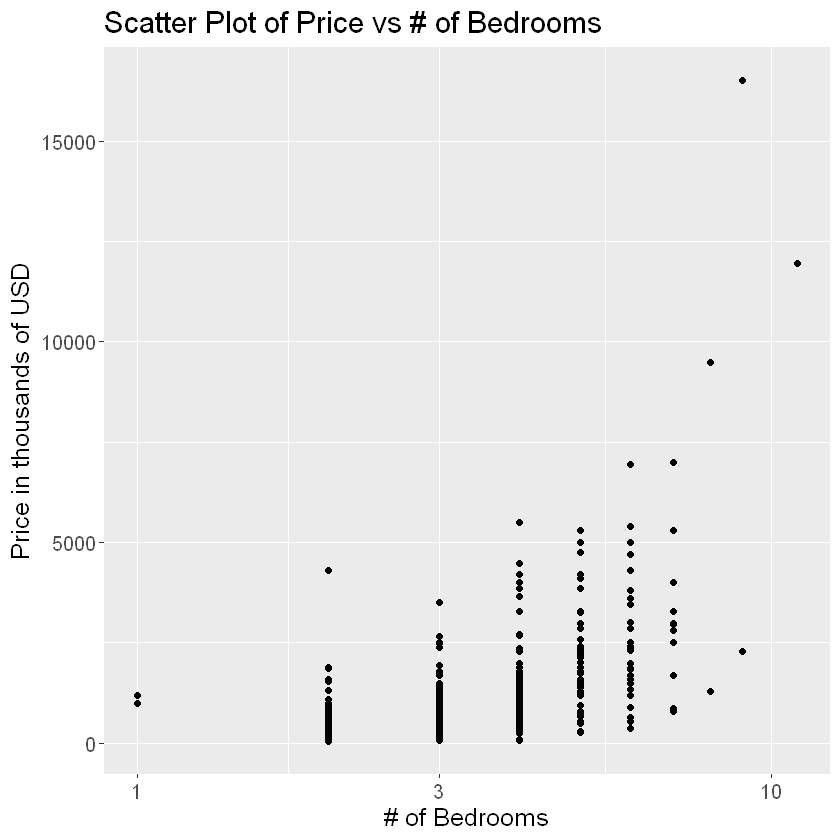

In [25]:
washington <- real_estate |>
  filter(city == "Washington")


ggplot(washington, aes(y = price, x = bed)) +
  geom_point() +
  labs(y = "Price in thousands of USD", x = "# of Bedrooms") +
  ggtitle("Scatter Plot of Price vs # of Bedrooms") +
  scale_x_log10() +
  theme(text = element_text(size = 15))
